<a href="https://colab.research.google.com/github/Kdavis2025/Automating-Compliance-AI-and-Machine-Learning-Approaches-to-Achieviing-CMMC-2.0-Certification/blob/main/Automated_Compliance_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

# Generate CMMC 2.0 system configuration parameters
system_config = {
    "CMMCVersion": "2.0",
    "FinalRule": {
        "RuleNumber": "2024-22905",
        "EffectiveDate": "2024-11-29",
        "FARClause": "52.204-21",
        "AssessmentRequirements": {
            "Level1": "Annual self-assessment",
            "Level2": "Annual third-party assessment",
            "Level3": "Annual Government-led assessment"
        },
        "ImplementationTimeline": {
            "Start": "2025-11-30",
            "Completion": "2026-11-30"
        }
    },
    "NISTReferences": [
        "NIST SP 800-171 Rev.2",
        "NIST SP 800-172"
    ],
    "Domains": [
        {"Abbrev": "AC", "Name": "Access Control"},
        {"Abbrev": "AT", "Name": "Awareness & Training"},
        {"Abbrev": "AU", "Name": "Audit & Accountability"},
        {"Abbrev": "CM", "Name": "Configuration Management"},
        {"Abbrev": "IA", "Name": "Identification & Authentication"},
        {"Abbrev": "IR", "Name": "Incident Response"},
        {"Abbrev": "MA", "Name": "Maintenance"},
        {"Abbrev": "MP", "Name": "Media Protection"},
        {"Abbrev": "PS", "Name": "Personnel Security"},
        {"Abbrev": "PE", "Name": "Physical Protection"},
        {"Abbrev": "RA", "Name": "Risk Assessment"},
        {"Abbrev": "CA", "Name": "Security Assessment"},
        {"Abbrev": "SC", "Name": "System & Communications Protection"},
        {"Abbrev": "SI", "Name": "System & Information Integrity"}
    ],
    "Levels": {
        "1": {
            "Name": "Foundational",
            "Focus": "Basic safeguarding of Federal Contract Information",
            "RequiredPractices": "17 controls aligned with FAR 52.204-21"
        },
        "2": {
            "Name": "Advanced",
            "Focus": "Protection of CUI",
            "RequiredPractices": "110 controls aligning with NIST SP 800-171 Rev.2"
        },
        "3": {
            "Name": "Expert",
            "Focus": "Advanced CUI protection and proactive threat hunting",
            "RequiredPractices": "110 controls + additional enhanced practices"
        }
    },
    "KeyUpdates": {
        "StreamlinedModel": "Reduced from 5 to 3 levels",
        "SelfAssessment": "Allowed for Level 1 and certain Level 2 contractors",
        "ClarifiedRequirements": "Aligned terminology with NIST SP 800-171 Rev.2",
        "ReportingTimelines": "Incident reporting within 72 hours"
    }
}

if __name__ == "__main__":
    with open("system_config.json", "w") as f:
        json.dump(system_config, f, indent=2)
    print("Generated 'system_config.json' with CMMC 2.0 parameters.")


Generated 'system_config.json' with CMMC 2.0 parameters.


In [ ]:
import json
import random

# Full list of CMMC 2.0 domains (abbreviations)
domains = [
    "AC",  # Access Control
    "AT",  # Awareness & Training
    "AU",  # Audit & Accountability
    "CM",  # Configuration Management
    "IA",  # Identification & Authentication
    "IR",  # Incident Response
    "MA",  # Maintenance
    "MP",  # Media Protection
    "PS",  # Personnel Security
    "PE",  # Physical Protection
    "RA",  # Risk Assessment
    "CA",  # Security Assessment
    "SC",  # System and Communications Protection
    "SI"   # System and Information Integrity
]

# Compliance levels
compliance_levels = [
    "Not Implemented",
    "Partially Implemented",
    "Fully Implemented"
]

# Source types for simulation
source_types = [
    "Synthetic",
    "Standardized"
]

# Sample business titles for simulation
business_titles = [
    "Alpha Cyber Solutions",
    "Titan Risk Management",
    "SecureOps Consulting",
    "Nova Compliance Group",
    "Integrity Assurance LLC",
    "Sentinel Security Services",
    "Guardian Risk Solutions",
    "Pinnacle Compliance Partners",
    "Quantum Cyber Defense",
    "Fortress Security Advisors",
    "Vanguard Compliance Technologies",
    "Shield Data Protection",
    "Aegis Security Architects",
    "Paragon Risk Analytics",
    "Zenith Cybersecurity",
    "Envoy Compliance Solutions",
    "Matrix Security Consulting",
    "Beacon Compliance Advisors",
    "Summit Security Services",
    "Cynosure Risk Management"
]

# Generate at least 250 compliance report entries
target_count = 250
entries = []

while len(entries) < target_count:
    domain = random.choice(domains)
    level = random.choice([1, 2, 3])
    # Simulate requirement numbers (001-150)
    req_num = random.randint(1, 150)
    req_id = f"{domain}.L{level}-{req_num:03d}"
    short_name = f"{domain}_L{level}_{req_num:03d}"
    statement = (
        f"Ensure that {domain} control requirement {req_num:03d} at Level {level} "
        "is documented and enforced across all applicable systems."
    )
    report = {
        "ControlID": req_id,
        "ShortName": short_name,
        "RequirementStatement": statement,
        "ComplianceLevel": random.choice(compliance_levels),
        "SourceType": random.choice(source_types),
        "BusinessTitle": random.choice(business_titles)
    }
    # Avoid duplicate ControlIDs
    if not any(e["ControlID"] == report["ControlID"] for e in entries):
        entries.append(report)

# Write to JSON file
with open("compliance_standards.json", "w") as f:
    json.dump(entries, f, indent=2)

print(f"Generated {len(entries)} compliance report entries in 'compliance_standards.json'.")


Generated 250 compliance report entries in 'compliance_standards.json'.


In [ ]:
import json
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import files

# --- Helper Functions ---
def load_json_upload(upload_widget):
    if upload_widget.value:
        uploaded_filename = list(upload_widget.value.keys())[0]
        content = upload_widget.value[uploaded_filename]['content']
        text = content.decode('utf-8')
        return json.loads(text)
    return None


def filter_standards(df, domains, levels, compliance):
    filtered = df[
        df['ControlID'].apply(lambda x: x.split('.')[0] in domains) &
        df['ControlID'].str.extract(r"\.L(\d)\-")[0].astype(int).isin(levels) &
        df['ComplianceLevel'].isin(compliance)
    ]
    return filtered


def scan_config(standards_df, config_df):
    merged = standards_df.merge(
        config_df[['ControlID', 'Status']], on='ControlID', how='left'
    )
    merged['Detected'] = merged['Status'].notnull()
    merged['Compliant'] = merged['Status'] == 'Fully Implemented'
    report = merged.to_dict(orient='records')
    deviations = merged[~merged['Compliant']]
    return report, deviations

# --- UI Components ---
std_upload = widgets.FileUpload(accept='.json', multiple=False, description='Upload Standards')
btn_load_std = widgets.Button(description='Load Standards', button_style='success')
domain_select = widgets.SelectMultiple(options=[], description='Domains')
level_select = widgets.SelectMultiple(options=[1,2,3], value=[1,2,3], description='Levels')
compl_select = widgets.SelectMultiple(options=["Not Implemented","Partially Implemented","Fully Implemented"], value=["Not Implemented","Partially Implemented","Fully Implemented"], description='Compliance')
btn_apply_filters = widgets.Button(description='Apply Filters')
cfg_upload = widgets.FileUpload(accept='.json', multiple=False, description='Upload Config')
btn_scan = widgets.Button(description='Run Scan', button_style='info')
out_std = widgets.Output()
out_filtered = widgets.Output()
out_scan = widgets.Output()

# --- Callbacks ---
def on_load_std(b):
    with out_std:
        clear_output()
        data = load_json_upload(std_upload)
        if data is None:
            print("No standards file uploaded.")
            return
        global standards_df
        standards_df = pd.DataFrame(data)
        domains = sorted(standards_df['ControlID'].str.split('.').str[0].unique())
        domain_select.options = domains
        domain_select.value = domains
        display(standards_df.head())


def on_apply_filters(b):
    with out_filtered:
        clear_output()
        if 'standards_df' not in globals():
            print("Load standards first.")
            return
        selected = filter_standards(standards_df, domain_select.value, level_select.value, compl_select.value)
        display(selected)
        selected.to_json('filtered_standards.json', orient='records', indent=2)
        files.download('filtered_standards.json')


def on_scan(b):
    with out_scan:
        clear_output()
        if 'standards_df' not in globals():
            print("Load standards first.")
            return
        cfg = load_json_upload(cfg_upload)
        if cfg is None:
            print("No config file uploaded.")
            return
        # Ensure config is a list of records
        if isinstance(cfg, dict):
            try:
                config_df = pd.DataFrame(cfg)
            except ValueError:
                print("Configuration JSON is not a list of control entries. Please upload an array of objects with 'ControlID' and 'Status'.")
                return
        else:
            config_df = pd.DataFrame(cfg)
        # Validate required columns
        if not {'ControlID', 'Status'}.issubset(config_df.columns):
            print("Configuration JSON must contain 'ControlID' and 'Status' fields.")
            return
        report, deviations = scan_config(standards_df, config_df)
        print("Compliance Report (JSON):")
        print(json.dumps(report, indent=2))
        print("\nFlagged Deviations:")
        display(deviations)
        deviations.to_json('deviations.json', orient='records', indent=2)
        files.download('deviations.json')

btn_load_std.on_click(on_load_std)
btn_apply_filters.on_click(on_apply_filters)
btn_scan.on_click(on_scan)

display(widgets.VBox([std_upload, btn_load_std, out_std]))
display(widgets.VBox([domain_select, level_select, compl_select, btn_apply_filters, out_filtered]))
display(widgets.VBox([cfg_upload, btn_scan, out_scan]))



,Controls,ManualTime_min,AutoTime_min,TimeSaved_min,ManualCost_$,AutoCost_$,CostSaved_$,AnnualSavings_$
0,50,250,5.0,245.0,416.666667,8.333333,408.333333,4900.0
1,100,500,10.0,490.0,833.333333,16.666667,816.666667,9800.0
2,150,750,15.0,735.0,1250.000000,25.000000,1225.000000,14700.0
3,200,1000,20.0,980.0,1666.666667,33.333333,1633.333333,19600.0
4,250,1250,25.0,1225.0,2083.333333,41.666667,2041.666667,24500.0


Manual RSME: 2.21980646867526e-13
Auto RSME: 1.9459014222361975e-15
Manual Cost RSME: 552.7707983925668
Auto Cost RSME: 11.055415967851332


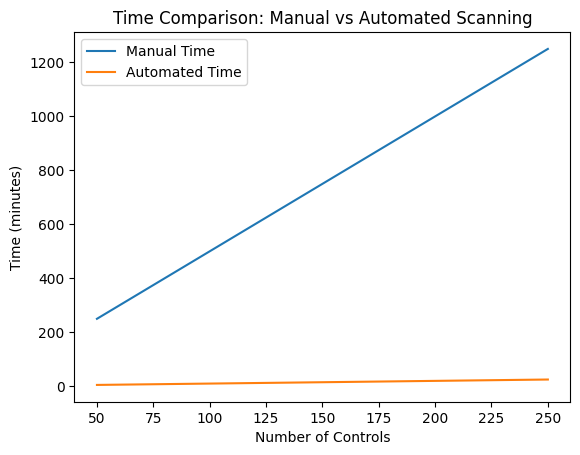

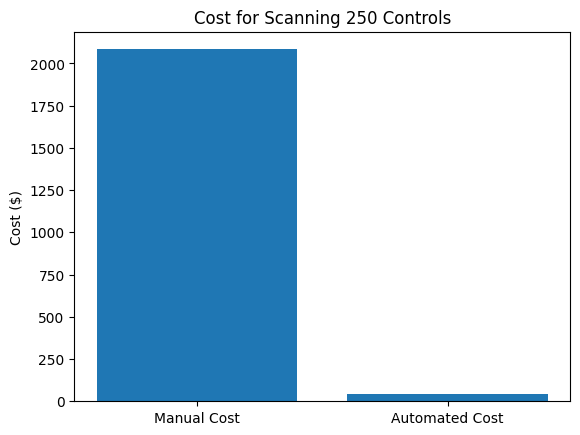

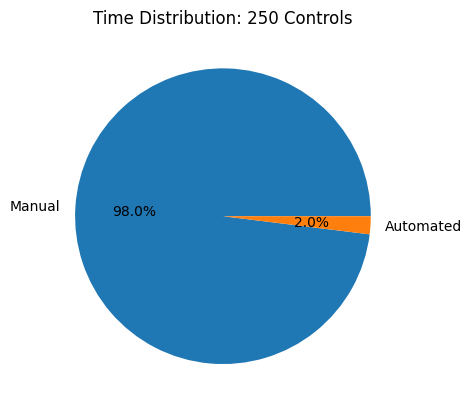

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
controls = np.arange(50, 251, 50)  # Number of controls
manual_time = controls * 5         # minutes per control (manual: 5 min/control)
auto_time = controls * 0.1         # minutes per control (automated: 0.1 min/control)
time_saved = manual_time - auto_time

cost_rate = 100  # $ per analyst hour
manual_cost = (manual_time / 60) * cost_rate
auto_cost = (auto_time / 60) * cost_rate
cost_saved = manual_cost - auto_cost

# Annual savings model (if scanned monthly)
monthly_savings = cost_saved
annual_savings = monthly_savings * 12

# Assemble dataframe
df = pd.DataFrame({
    'Controls': controls,
    'ManualTime_min': manual_time,
    'AutoTime_min': auto_time,
    'TimeSaved_min': time_saved,
    'ManualCost_$': manual_cost,
    'AutoCost_$': auto_cost,
    'CostSaved_$': cost_saved,
    'AnnualSavings_$': annual_savings
})

# Display metrics table (Using Pandas display function for Colab compatibility)
from IPython.display import display
display(df)

# Linear regression models
m_manual, b_manual = np.polyfit(controls, manual_time, 1)
m_auto, b_auto = np.polyfit(controls, auto_time, 1)

#Calculate RSME of manual scannning vs automatic scanning
manual_rmse = np.sqrt(np.mean((manual_time - (m_manual * controls + b_manual)) ** 2))
auto_rmse = np.sqrt(np.mean((auto_time - (m_auto * controls + b_auto)) ** 2))
print(f"Manual RSME: {manual_rmse}")
print(f"Auto RSME: {auto_rmse}")

#Calculate RSME of manua cost vs automatic cost
manual_cost_rmse = np.sqrt(np.mean((manual_cost - (m_manual * controls + b_manual)) ** 2))
auto_cost_rmse = np.sqrt(np.mean((auto_cost - (m_auto * controls + b_auto)) ** 2))
print(f"Manual Cost RSME: {manual_cost_rmse}")
print(f"Auto Cost RSME: {auto_cost_rmse}")


# Chart 1: Time vs Controls
plt.figure()
plt.plot(controls, manual_time, label='Manual Time')
plt.plot(controls, auto_time, label='Automated Time')
plt.xlabel('Number of Controls')
plt.ylabel('Time (minutes)')
plt.title('Time Comparison: Manual vs Automated Scanning')
plt.legend()
plt.show()

# Chart 2: Cost Comparison at 250 Controls
ctrl = 250
idx = list(controls).index(ctrl)
plt.figure()
plt.bar(['Manual Cost', 'Automated Cost'], [manual_cost[idx], auto_cost[idx]])
plt.ylabel('Cost ($)')
plt.title('Cost for Scanning 250 Controls')
plt.show()

# Chart 3: Time Distribution at 250 Controls
plt.figure()
plt.pie([manual_time[idx], auto_time[idx]], labels=['Manual', 'Automated'], autopct='%1.1f%%')
plt.title('Time Distribution: 250 Controls')
plt.show()